# Pyber Challenge

### Load and Read CSV files

In [55]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [56]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [57]:
# Create Series for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

####  1. Get the total rides for each city type

In [58]:
#  1. Get the total rides for each city type
# urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]
# suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]
# rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]

ride_count = pyber_data_df.groupby("type").count()["ride_id"]
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

#### 2. Get the total drivers for each city type

In [59]:
# 2. Get the total drivers for each city type
# https://stackoverflow.com/questions/56220045/how-to-sum-distinct-rows-in-a-pandas-dataframe
driver_count = pyber_data_df.drop_duplicates(["city","type"]).groupby(["type"]).sum()["driver_count"]
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

####  3. Get the total amount of fares for each city type

In [60]:
#  3. Get the total amount of fares for each city type

total_fare = pyber_data_df.groupby("type").sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

####  4. Get the average fare per ride for each city type.

In [61]:
#  4. Get the average fare per ride for each city type. 

fare_per_ride = total_fare / ride_count
fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

#### 5. Get the average fare per driver for each city type. 

In [62]:
# 5. Get the average fare per driver for each city type. 

fare_per_driver = total_fare / driver_count
fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

####  6. Create a PyBer summary DataFrame.

In [63]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
        {
          "Total Rides": ride_count,
          "Total Drivers": driver_count,       
          "Total Fares": total_fare,
          "Average Fare per Ride": fare_per_ride,
          "Average Fare per Driver": fare_per_driver,  
        })
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


####  7. Cleaning up the DataFrame. Delete the index name

In [64]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

####  8. Format the columns.

In [65]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

####  Read the merged DataFrame

In [66]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


#### 1. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date

In [67]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(["date","type"]).sum()["fare"]
fares_by_date

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

#### 2. Reset the index on the DataFrame you created in #1.

In [68]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_df = fares_by_date.reset_index()
# fares_by_date_df

In [69]:
# fares_by_date_df.dtypes

In [70]:
#  Change the 'date' column to a datetime object.
fares_by_date_df['date']= pd.to_datetime(fares_by_date_df['date'])
# fares_by_date_df.dtypes

#### 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 

In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fares_by_date_pivot = fares_by_date_df.pivot(index="date", columns="type", values="fare")
fares_by_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


#### 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

In [84]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_Jan_Apr = fares_by_date_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_Apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


#### 5. Set the "date" index to datetime datatype.

In [73]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_Apr.index = pd.to_datetime(fares_Jan_Apr.index)
# fares_Jan_Apr

#### 6. Check that the datatype for the index is datetime using df.info()

In [74]:
# 7. Check that the datatype for the index is datetime using df.info()

fares_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


#### 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

In [75]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_Apr.resample('W').sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


#### 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

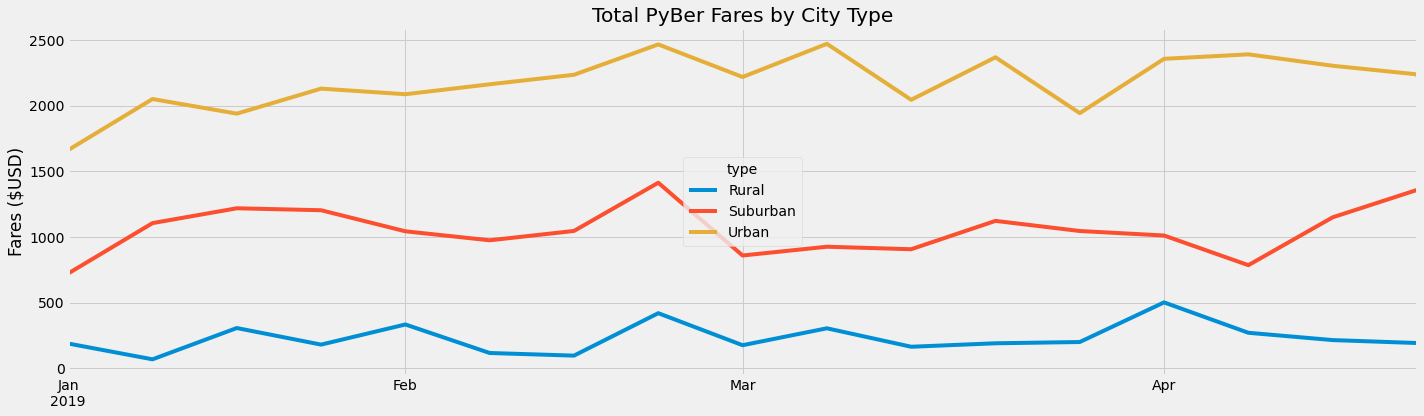

In [90]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_fares = weekly_fares_df.plot(figsize=(20,6))

weekly_fares.set_xlim([pd.to_datetime('2019-01-01 23:50:00'), pd.to_datetime('2019-04-28 00:10:00')])

weekly_fares.set_title("Total PyBer Fares by City Type")

weekly_fares.set_xlabel('')
weekly_fares.set_ylabel("Fares ($USD)")

plt.savefig("analysis/PyBer_fare_summary.png")

plt.tight_layout()
plt.show()

#### Change up the chart a little

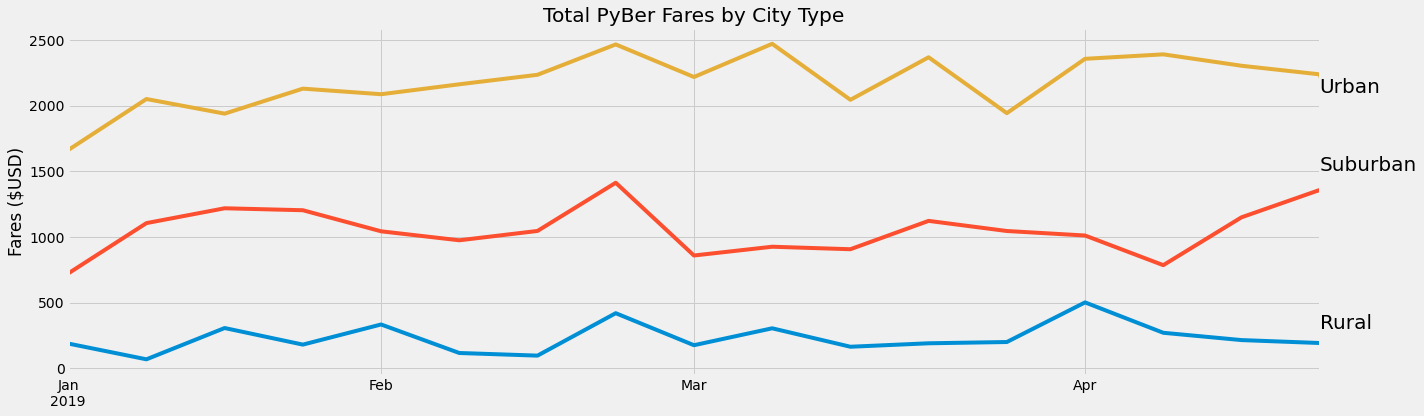

In [107]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.
# Try new charts

weekly_fares = weekly_fares_df.plot(figsize=(20,6))

weekly_fares.set_xlim([pd.to_datetime('2019-01-01 23:50:00'), pd.to_datetime('2019-04-28 00:10:00')])

weekly_fares.set_title("Total PyBer Fares by City Type")

weekly_fares.set_xlabel('')
weekly_fares.set_ylabel("Fares ($USD)")

plt.text('2019-04-28 00:10:00',300,'Rural',fontsize=20)
plt.text('2019-04-28 00:10:00',1500,'Suburban',fontsize=20)
plt.text('2019-04-28 00:10:00',2100,'Urban',fontsize=20)

plt.legend().remove()

plt.savefig("analysis/PyBer_fare_summary_new.png")

# plt.show()
plt.tight_layout()
plt.show()

In [78]:
#  Unformated data frame for bar charts
pyber_summary_df = pd.DataFrame(
        {
          "Total Rides": ride_count,
          "Total Drivers": driver_count,       
          "Total Fares": total_fare,
          "Average Fare per Ride": fare_per_ride,
          "Average Fare per Driver": fare_per_driver,  
        })
pyber_summary_df.reset_index()


,index,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


#### Bar chart for Total Rides by City Type

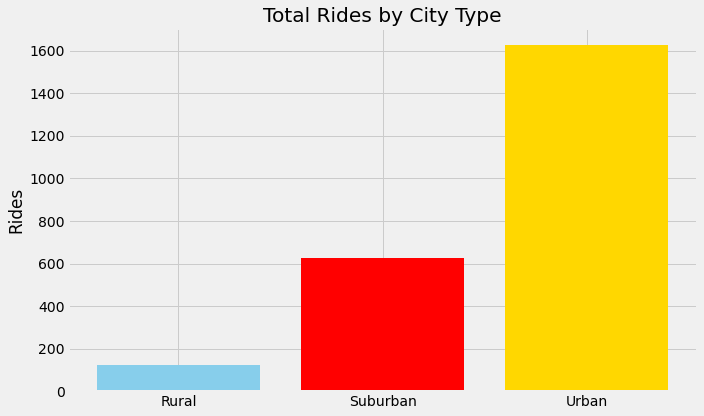

In [79]:
plt.figure(figsize=(10,6))

x=['Rural','Suburban','Urban']

plt.bar(x,pyber_summary_df["Total Rides"],align="center",color=('skyblue','red','gold'))

plt.title("Total Rides by City Type")
plt.ylabel("Rides")

plt.savefig("analysis/PyBer_fare_summary_rides.png")
# plt.show()
plt.tight_layout()
plt.show()

#### Bar chart for Total Drivers by City Type

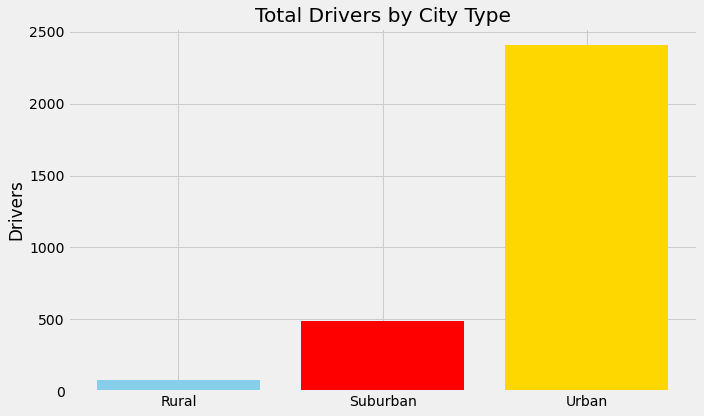

In [80]:
plt.figure(figsize=(10,6))

x=['Rural','Suburban','Urban']

plt.bar(x,pyber_summary_df["Total Drivers"],align="center",color=('skyblue','red','gold'))

plt.title("Total Drivers by City Type")
plt.ylabel("Drivers")

plt.savefig("analysis/PyBer_fare_summary_drivers.png")

plt.tight_layout()
plt.show()

#### Bar chart for Total Fares by City Type

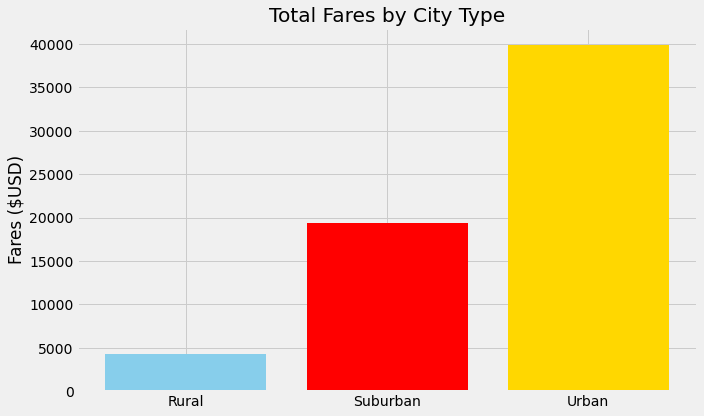

In [81]:
plt.figure(figsize=(10,6))

x=['Rural','Suburban','Urban']

plt.bar(x,pyber_summary_df["Total Fares"],align="center",color=('skyblue','red','gold'))

plt.title("Total Fares by City Type")
plt.ylabel("Fares ($USD)")

plt.savefig("analysis/PyBer_fare_summary_fares.png")

plt.tight_layout()
plt.show()

#### Bar chart for Average Fare per Ride by City Type

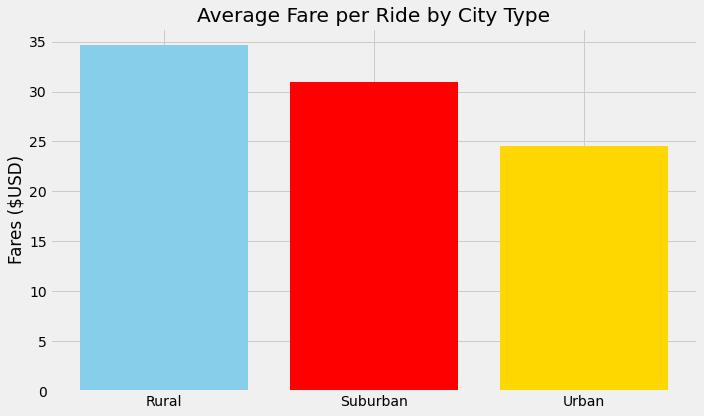

In [82]:
plt.figure(figsize=(10,6))

plt.bar(x,pyber_summary_df["Average Fare per Ride"],align="center",color=('skyblue','red','gold'))

plt.title("Average Fare per Ride by City Type")
plt.ylabel("Fares ($USD)")

plt.savefig("analysis/PyBer_fare_summary_farespercity.png")

plt.tight_layout()
plt.show()

#### Bar chart for Average Fare per Driver by City Type

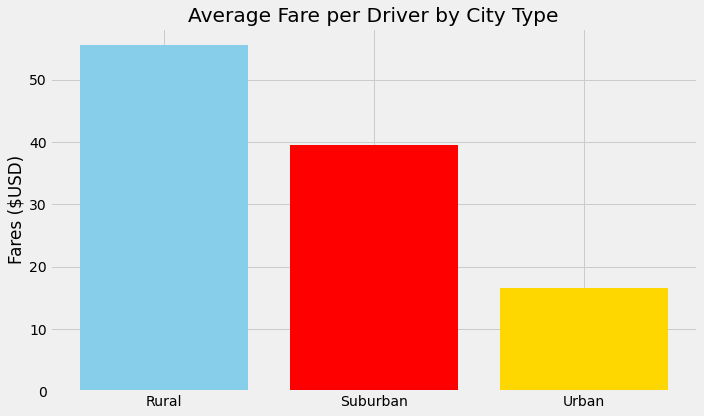

In [83]:
plt.figure(figsize=(10,6))

x=['Rural','Suburban','Urban']

plt.bar(x,pyber_summary_df["Average Fare per Driver"],align="center",color=('skyblue','red','gold'))

plt.title("Average Fare per Driver by City Type")
plt.ylabel("Fares ($USD)")

plt.savefig("analysis/PyBer_fare_summary_faresperdriver.png")

plt.tight_layout()
plt.show()